# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns

sns.set()
sns.set_context("notebook")
sns.set_style("whitegrid")

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [32]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [43]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

        
        
# https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&exclude={part}&appid={API key}

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hualmay
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | sapa
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | moron
Processing Record 7 of Set 1 | nuuk
Processing Record 8 of Set 1 | ixtapa
Processing Record 9 of Set 1 | benghazi
Processing Record 10 of Set 1 | mut
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | ukiah
Processing Record 14 of Set 1 | dali
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | provideniya
Processing Record 18 of Set 1 | namatanai
Processing Record 19 of Set 1 | katherine
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | hith

Processing Record 38 of Set 4 | pevek
Processing Record 39 of Set 4 | bengkulu
Processing Record 40 of Set 4 | chatellerault
Processing Record 41 of Set 4 | huaibei
Processing Record 42 of Set 4 | munster
Processing Record 43 of Set 4 | cotonou
Processing Record 44 of Set 4 | qaqortoq
Processing Record 45 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 46 of Set 4 | kiama
Processing Record 47 of Set 4 | sitka
Processing Record 48 of Set 4 | esperance
Processing Record 49 of Set 4 | chokurdakh
Processing Record 0 of Set 5 | tessalit
Processing Record 1 of Set 5 | maragogi
Processing Record 2 of Set 5 | gazli
Processing Record 3 of Set 5 | jimenez
Processing Record 4 of Set 5 | souillac
Processing Record 5 of Set 5 | panlaitan
Processing Record 6 of Set 5 | grindavik
Processing Record 7 of Set 5 | port alfred
Processing Record 8 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 5 | mazagao
Processing Record 10 of Set 5 | puerto 

Processing Record 29 of Set 8 | tres arroyos
Processing Record 30 of Set 8 | kuche
City not found. Skipping...
Processing Record 31 of Set 8 | pidhorodne
Processing Record 32 of Set 8 | anadyr
Processing Record 33 of Set 8 | tabou
Processing Record 34 of Set 8 | lillooet
Processing Record 35 of Set 8 | ensenada
Processing Record 36 of Set 8 | burica
City not found. Skipping...
Processing Record 37 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 38 of Set 8 | vila
Processing Record 39 of Set 8 | herat
Processing Record 40 of Set 8 | naze
Processing Record 41 of Set 8 | waqqas
Processing Record 42 of Set 8 | san cristobal
Processing Record 43 of Set 8 | eureka
Processing Record 44 of Set 8 | togur
Processing Record 45 of Set 8 | evensk
Processing Record 46 of Set 8 | zhuhai
Processing Record 47 of Set 8 | tazovskiy
Processing Record 48 of Set 8 | canico
Processing Record 49 of Set 8 | bismarck
Processing Record 0 of Set 9 | port hardy
Processing Record 1 of Set 9 | far

Processing Record 19 of Set 12 | lamu
Processing Record 20 of Set 12 | limoges
Processing Record 21 of Set 12 | acarau
Processing Record 22 of Set 12 | kalat
Processing Record 23 of Set 12 | freeport
Processing Record 24 of Set 12 | jijiga
Processing Record 25 of Set 12 | mrirt
City not found. Skipping...
Processing Record 26 of Set 12 | kadnikov
Processing Record 27 of Set 12 | half moon bay
Processing Record 28 of Set 12 | khomutovo
Processing Record 29 of Set 12 | morant bay
Processing Record 30 of Set 12 | marawi
Processing Record 31 of Set 12 | ust-koksa
Processing Record 32 of Set 12 | alta floresta
Processing Record 33 of Set 12 | tekkalakota
City not found. Skipping...
Processing Record 34 of Set 12 | springbok
Processing Record 35 of Set 12 | christchurch
Processing Record 36 of Set 12 | leszno
Processing Record 37 of Set 12 | nabul
City not found. Skipping...
Processing Record 38 of Set 12 | bojnurd
Processing Record 39 of Set 12 | kasongo-lunda
Processing Record 40 of Set 12

In [44]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [45]:
# Display sample data
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hualmay,-11.0964,-77.6139,20.86,81,79,2.99,PE,1673232931
1,mataura,-46.1927,168.8643,28.60,29,0,2.26,NZ,1673232932
2,sapa,5.1544,120.3241,26.18,83,100,5.33,PH,1673232932
3,saskylakh,71.9167,114.0833,-31.19,98,100,2.93,RU,1673232932
4,ushuaia,-54.8000,-68.3000,18.81,52,75,2.06,AR,1673232933
5,moron,-34.6534,-58.6198,25.54,77,0,4.88,AR,1673232933
6,nuuk,64.1835,-51.7216,-4.89,84,100,3.74,GL,1673232934
7,ixtapa,20.7000,-105.2000,19.56,65,1,1.49,MX,1673232934
8,benghazi,32.1167,20.0667,15.29,70,11,1.62,LY,1673232934
9,mut,36.6439,33.4389,4.49,65,0,2.72,TR,1673232773


In [47]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [48]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hualmay,-11.0964,-77.6139,20.86,81,79,2.99,PE,1673232931
1,mataura,-46.1927,168.8643,28.60,29,0,2.26,NZ,1673232932
2,sapa,5.1544,120.3241,26.18,83,100,5.33,PH,1673232932
3,saskylakh,71.9167,114.0833,-31.19,98,100,2.93,RU,1673232932
4,ushuaia,-54.8000,-68.3000,18.81,52,75,2.06,AR,1673232933


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

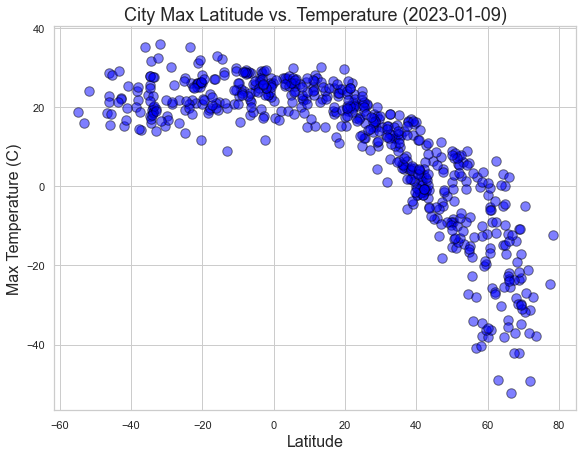

In [114]:
# Build scatter plot for latitude vs. temperature
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Max Temp"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Max Temperature (C)", fontsize=16)
plt.title("City Max Latitude vs. Temperature (2023-01-09)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

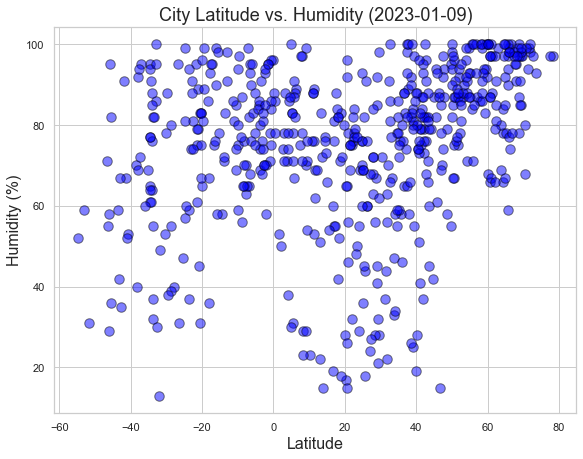

In [113]:
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Humidity"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Humidity (%)", fontsize=16)
plt.title("City Latitude vs. Humidity (2023-01-09)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

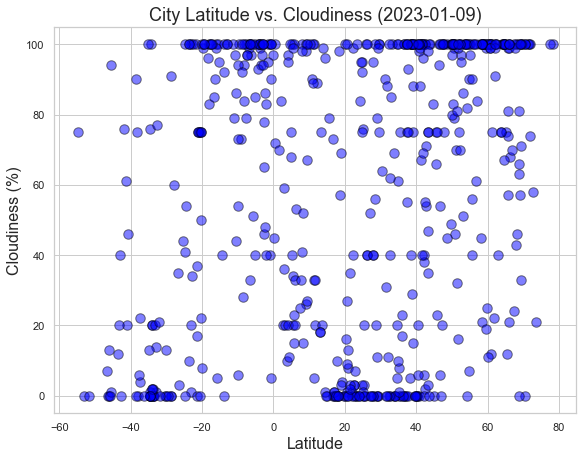

In [112]:
# Build the scatter plots for latitude vs. cloudiness
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Cloudiness"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Cloudiness (%)", fontsize=16)
plt.title("City Latitude vs. Cloudiness (2023-01-09)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

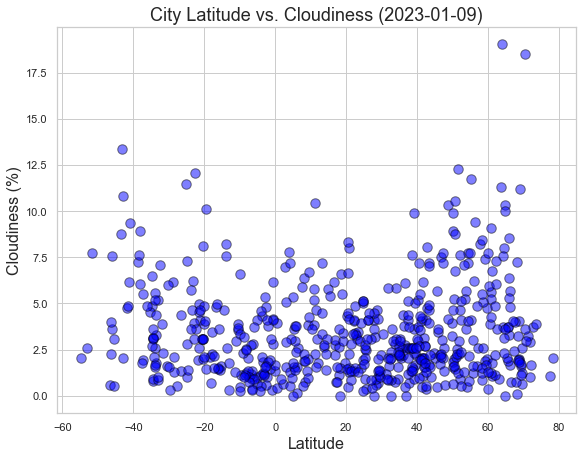

In [111]:
# Build the scatter plots for latitude vs. wind speed
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Wind Speed"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Cloudiness (%)", fontsize=16)
plt.title("City Latitude vs. Cloudiness (2023-01-09)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


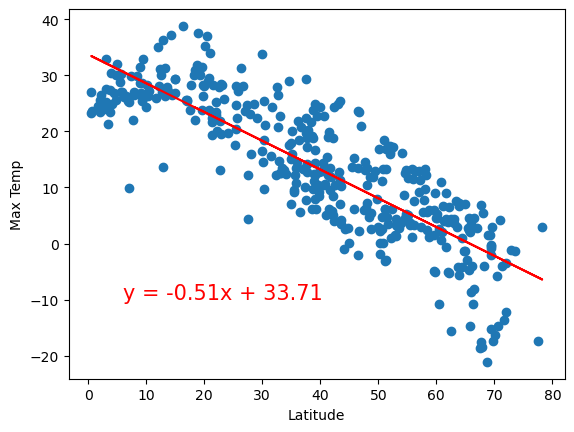

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


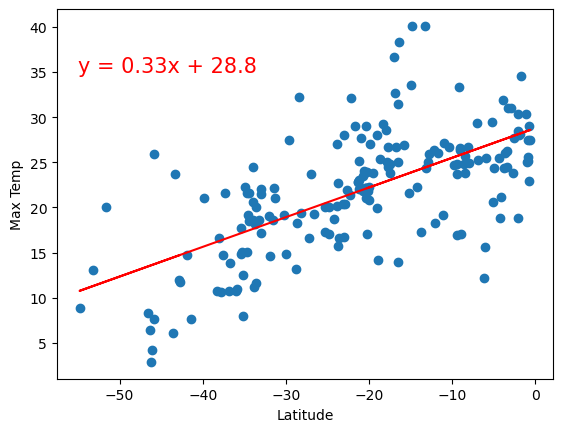

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


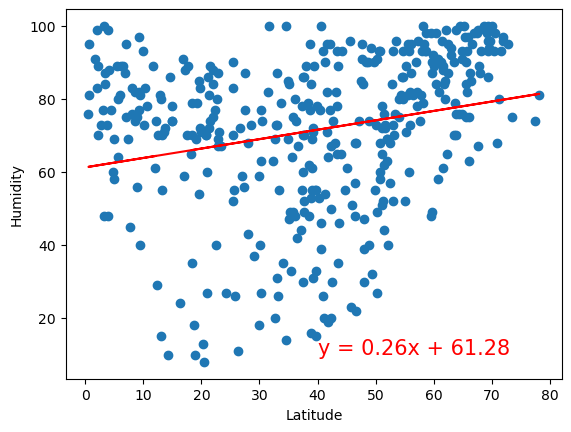

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


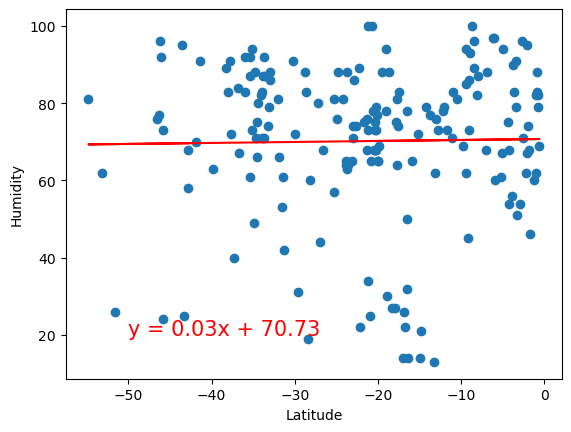

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


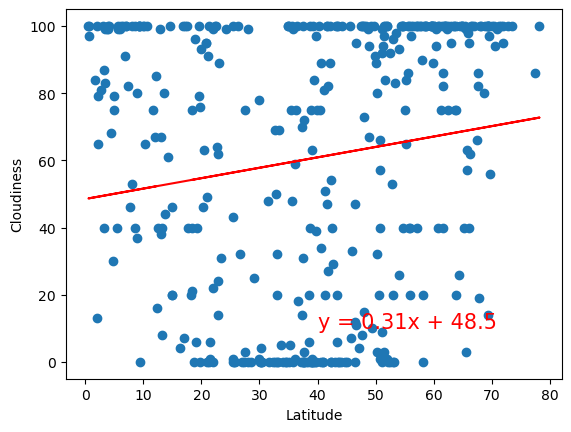

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


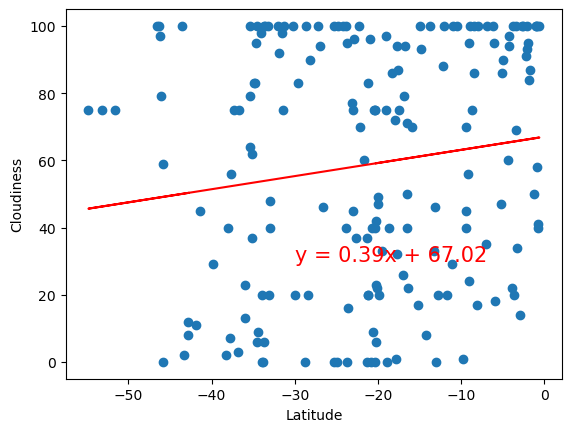

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


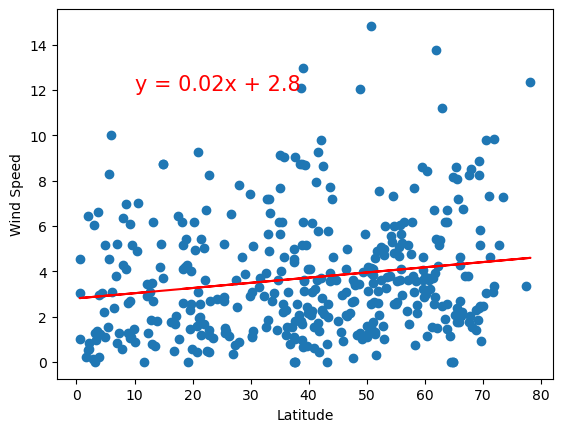

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


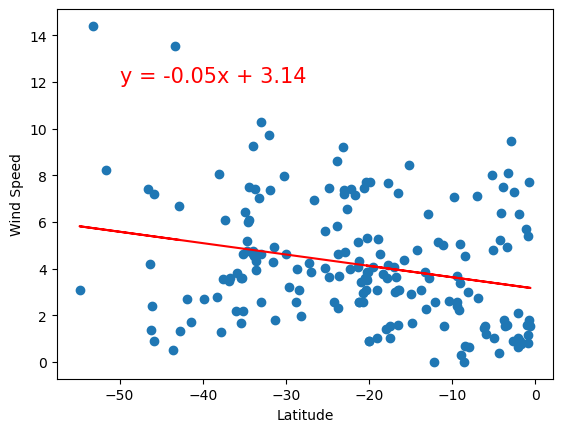

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE